In [285]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import missingno as msno
from sklearn.preprocessing import PolynomialFeatures
#from itertools import combinations
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

import warnings
%matplotlib inline
sns.set(style='whitegrid')
warnings.simplefilter('ignore')

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Fixing Random seed and package version for reproducible experiments:

In [4]:
RANDOM_SEED = 42

In [5]:
!pip freeze > requirements.txt

# DATA

In [6]:
df_train = pd.read_csv('/Users/andrei/Desktop/SkillFactory/Project 4/kaggle/main_task.csv')
df_test = pd.read_csv('/Users/andrei/Desktop/SkillFactory/Project 4/kaggle/kaggle_task.csv')
sample_submission = pd.read_csv('/Users/andrei/Desktop/SkillFactory/Project 4/kaggle/sample_submission.csv')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [9]:
df_train.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
13946,id_3860,Barcelona,"['Cafe', 'Fast Food', 'Healthy']",3861.0,3.5,$$ - $$$,44.0,"[['Excellent sandwiches, but ... high priced',...",/Restaurant_Review-g187497-d4992277-Reviews-Sa...,d4992277
33068,id_1252,Geneva,"['Pizza', 'Fast Food']",1258.0,2.5,NaN,7.0,"[['Seriously ??'], ['11/21/2014']]",/Restaurant_Review-g188057-d6901717-Reviews-FN...,d6901717
26673,id_1198,Dublin,['Chinese'],1201.0,5.0,NaN,NaN,"[['Great food, great value'], ['09/09/2012']]",/Restaurant_Review-g186605-d2660122-Reviews-Ti...,d2660122
24182,id_3391,Barcelona,NaN,3392.0,5.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187497-d12419880-Reviews-B...,d12419880
32424,id_4263,London,"['Italian', 'Gluten Free Options', 'Vegetarian...",4270.0,4.0,$$ - $$$,152.0,"[['Early Evening Meal', 'Quick coffees!'], ['0...",/Restaurant_Review-g186338-d1014903-Reviews-Ca...,d1014903


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [11]:
df_test.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
8646,id_8646,Lisbon,"['Mediterranean', 'European', 'Portuguese', 'V...",64.0,$$ - $$$,495.0,"[['Excellent Food and very Friendly Service', ...",/Restaurant_Review-g189158-d5484911-Reviews-Ta...,d5484911
914,id_914,London,NaN,12443.0,NaN,NaN,"[[], []]",/Restaurant_Review-g186338-d5122301-Reviews-Ha...,d5122301
1513,id_1513,Hamburg,NaN,2698.0,NaN,2.0,"[['Worst experience of my life'], ['06/07/2017']]",/Restaurant_Review-g187331-d5980811-Reviews-Ta...,d5980811
8184,id_8184,Oporto,"['European', 'Portuguese', 'Contemporary', 'Ga...",481.0,$$ - $$$,42.0,"[['Very good', 'The very best steak & Beer of ...",/Restaurant_Review-g189180-d7239668-Reviews-Cl...,d7239668
5163,id_5163,Warsaw,"['Chinese', 'Asian', 'Vegetarian Friendly', 'V...",88.0,$$ - $$$,150.0,"[['Good place to eat!', 'Super'], ['01/02/2018...",/Restaurant_Review-g274856-d948191-Reviews-Res...,d948191


In [12]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [13]:
sample_submission.sample(5)

,Restaurant_id,Rating
9785,id_9785,5.0
8651,id_8651,3.0
726,id_726,3.5
2843,id_2843,4.0
8332,id_8332,5.0


In [14]:
# For correct preprocecing of features train and test combining into one dataset 
df_train['sample'] = 1 # signing as train
df_test['sample'] = 0 # singning as test 
df_test['Rating'] = 0 # in the test there is no Rating, it's a target feature, therefore fulling it with zeros

data = df_test.append(df_train, sort=False).reset_index(drop=True) # combining

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


# Data Pre-processing and Cleaning

In [150]:
df = data.copy()

#### Checking for missing values

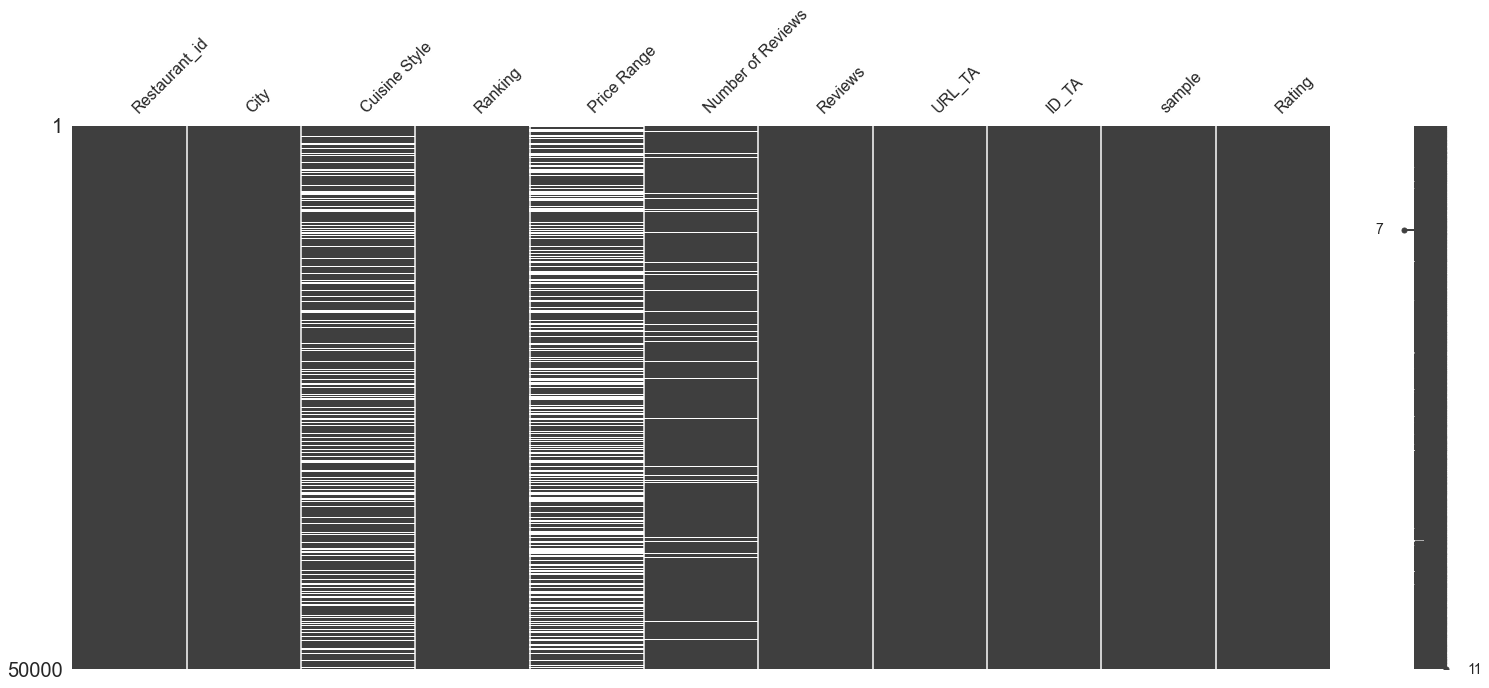

In [151]:
msno.matrix(df)

#### Looking for the duplicate rowas in the dataset

In [152]:
print('No duplicates found' if df.duplicated().sum() == 0 else 'Duplicates found')

No duplicates found


#### Descriptive statistics

In [153]:
df.describe()

,Ranking,Number of Reviews,sample,Rating
count,50000.000000,46800.000000,50000.000000,50000.000000
mean,3664.427520,124.471197,0.800000,3.194430
std,3700.092452,294.114345,0.400004,1.705453
min,1.000000,2.000000,0.000000,0.000000
25%,972.000000,9.000000,1.000000,3.000000
50%,2278.000000,33.000000,1.000000,4.000000
75%,5241.000000,115.000000,1.000000,4.500000
max,16444.000000,9660.000000,1.000000,5.000000


#### Checking for data uniqueness

In [154]:
df.nunique()

Restaurant_id        13094
City                    31
Cuisine Style        10731
Ranking              12975
Price Range              3
Number of Reviews     1573
Reviews              41857
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

#### For more convinient pre-processing columns names will be updated

In [155]:
df.columns = [x.replace(' ','_') for x in df.columns]

## City

## Cuisine_Style

#### Cleaning of Cuisine_Style column

In [156]:
#Removing square brackets
df['Cuisine_Style'] = df['Cuisine_Style'].apply(lambda x:str(x)[1:-1])

#Removing quotes
df.Cuisine_Style = df.Cuisine_Style.apply(lambda x:str(x).replace("'",'') if ("'" in str(x)) else x)

#Removing gaps
df.Cuisine_Style = df.Cuisine_Style.apply(lambda x:str(x).replace(" ",''))
#Raplasing 'a' to a 'misssing value'
df.loc[(df.Cuisine_Style == 'a'),'Cuisine_Style']='unknown'

df

,Restaurant_id,City,Cuisine_Style,Ranking,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"Bar,Pub",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"European,Scandinavian,GlutenFreeOptions,Vegeta...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,VegetarianFriendly,810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"Italian,Mediterranean,European,VegetarianFrien...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"Italian,Mediterranean,European,Seafood,Vegetar...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"Italian,VegetarianFriendly,VeganOptions,Gluten...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"French,American,Bar,European,VegetarianFriendly",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"Japanese,Sushi",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"Polish,European,EasternEuropean,CentralEuropea...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


#### Count of unique cuisines

In [157]:
cuisine_style=[]
for i in range(len(df)):
    cuisine_style.extend(df.Cuisine_Style.iloc[i].split(','))
    
print(len(set(cuisine_style )))

126


The right answer is 125, due-to one extra value added as 'unknown'

#### Finding out most popular cuisine

In [158]:
pd.DataFrame(df.Cuisine_Style.str.split(',').tolist()).stack().value_counts()[:1]

VegetarianFriendly    14021
dtype: int64

Based on the information of the most popular cuisine, the decision was made to generate a feature where the value 1 will be given to the restaurant which has a Vegetarian cuisine, and 0 to the restaurant which has not Vegetarian cuisine

## Ranking

Column Ranking has asymmetrical distribution shape, subsequently for better results of modeling should be found a way how to normalize this distribution

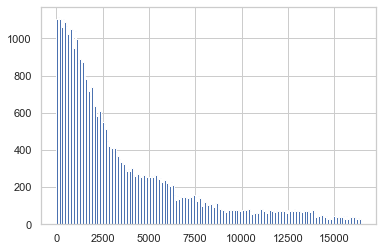

In [159]:
df.Ranking.hist(bins=200)

## Rating (Target variable)

Let's take a look at the Rating distribution

Text(0.5, 1.0, 'Rating_distribution')

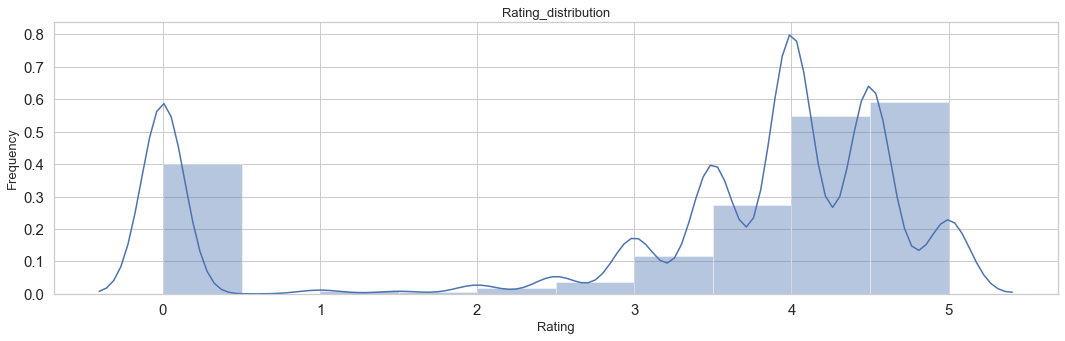

In [160]:
fig = plt.figure(figsize=(18, 5))
ax_2 = sns.distplot(df.Rating, bins=10)
plt.yticks(size=15)
plt.xticks(size=15)
ax_2.set_ylabel('Frequency', size=13)
ax_2.set_xlabel('Rating', size=13)
ax_2.set_title('Rating_distribution', size=13)

## Price_Rang

In [161]:
df.Price_Range.unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

Adopting features values for further processing

In [162]:
df.Price_Range = df.Price_Range.map({'$': 'Inexpensive', '$$ - $$$': 'Moderately_expensive', '$$$$': 'Very_expensive', np.nan: 'No_Price'})
df.sample(3)

,Restaurant_id,City,Cuisine_Style,Ranking,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,sample,Rating
36813,id_9482,London,International,9491.0,Very_expensive,NaN,"[['Chills and Breath taking'], ['01/10/2016']]",/Restaurant_Review-g186338-d731913-Reviews-Sea...,d731913,1,5.0
12767,id_13572,London,"French,Seafood",13582.0,No_Price,3.0,"[['Accceptable', 'Fish & Chips'], ['10/08/2012...",/Restaurant_Review-g186338-d799329-Reviews-Sea...,d799329,1,3.5
1833,id_1833,London,"Vietnamese,VegetarianFriendly,GlutenFreeOptions",5329.0,Inexpensive,263.0,"[['Curry is sooooo good', 'Nice food and good ...",/Restaurant_Review-g186338-d2330413-Reviews-Mi...,d2330413,0,0.0


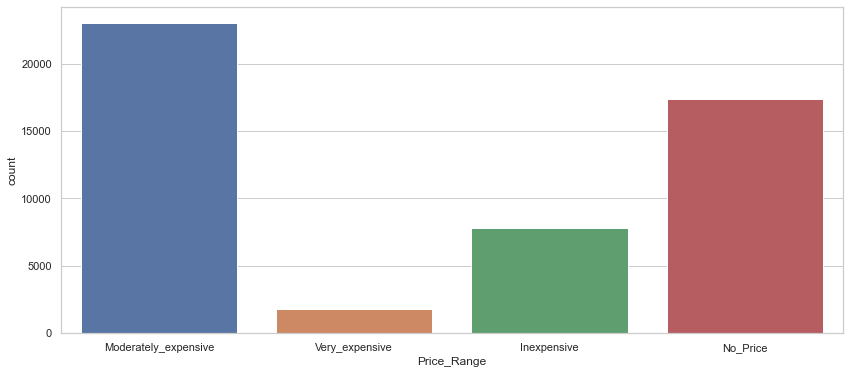

In [163]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(df.Price_Range)

## Number_of_Reviews

Text(0.5, 1.0, 'Number_of_Reviews_distribution')

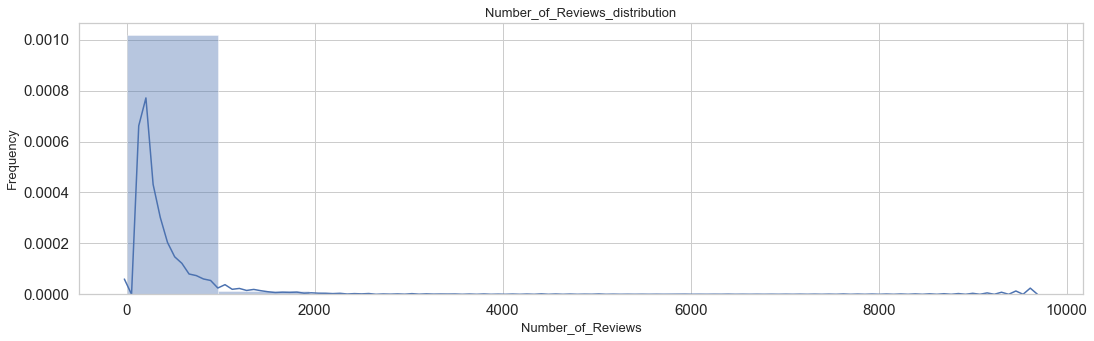

In [165]:
fig = plt.figure(figsize=(18, 5))
ax_2 = sns.distplot(df.Number_of_Reviews, bins=10)
plt.yticks(size=15)
plt.xticks(size=15)
ax_2.set_ylabel('Frequency', size=13)
ax_2.set_xlabel('Number_of_Reviews', size=13)
ax_2.set_title('Number_of_Reviews_distribution', size=13)

Replacing missing values with mean()

In [166]:
df.Number_of_Reviews = df.Number_of_Reviews.fillna(np.mean(df.Number_of_Reviews))

## Reviews

Dealing with missing values

In [167]:
df.Reviews.isna().sum()

2

In [168]:
df.Reviews = df.Reviews.fillna('[[], []]')

Deriving information of review post latest date, and then based on the difference between latest and previous review creating a new feature Timedelta

In [169]:
#Generation of columns with timedate of riview post and column with time difference between them

    def fix_Reviews(x):
        if x == '[[], []]':
            return []
        else:
            x = x.replace(']]', '')
            x = x.replace("'", '')
            x = x.split('], [')[1]
            x = x.split(', ')
            return x
    df['Dates of Reviews'] = df['Reviews'].apply(fix_Reviews)
    df[['Date_1', 'Date_2']] = pd.DataFrame(df['Dates of Reviews'].tolist())
    df['Date_1'] = pd.to_datetime(df['Date_1']).dt.date
    df['Date_2'] = pd.to_datetime(df['Date_2']).dt.date
    df['Timedelta'] = df['Date_1']-df['Date_2']

Converting feature Timedelta into readable format for modeling

In [170]:
df.Timedelta = df.Timedelta.dt.days

In [171]:
df.Timedelta.isna().sum()

13794

In [172]:
df.Timedelta = df.Timedelta.fillna(np.mean(df.Timedelta))

It is also a thing to think about negative values of Timedelda feature

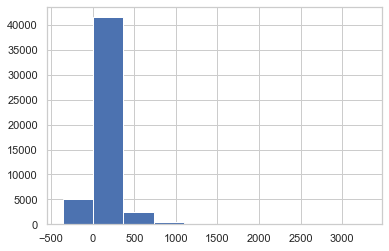

In [173]:
df.Timedelta.hist()

## URL_TA and ID_TA

Dropping features URL_TA and ID_TA, as well let's drop 'Dates of Reviews', 'Date_1', 'Date_2'.

In [114]:
#df.drop(['URL_TA', 'ID_TA', 'Dates of Reviews', 'Date_1', 'Date_2'], axis=1, inplace=True)

# Feature Engineering

One feature already has been made, it's Timedelta, which shows difference between latest and previous reviews

In this part from data will be derives deep insight subsequently converted into new features which will be tested on modeling results

## Cuisine_Style insights

#### Generation of 40 the most popular cusines as dummy variables 

In [174]:
q = set(pd.DataFrame(df.Cuisine_Style.str.split(',').tolist()).stack().value_counts().index[:40])


def find_item(cell):
    if item in cell:
        return 1
    return 0


for item in q:
    df[item] = df['Cuisine_Style'].apply(find_item)

#### Generation of feature Cuisine_Count

In [175]:
df['Cuisine_Count'] = df.Cuisine_Style.map(lambda x: len(x.split(',')))

In [176]:
# Cuisines mean value by restaurant
np.mean(df.Cuisine_Count)

2.62532

## Dummy variables

In [177]:
def add_dummies(df, column):
    dummies = pd.get_dummies(df[column], prefix=column)
    return df.join(dummies)

In [178]:
df = add_dummies(df, 'City')
df = add_dummies(df, 'Price_Range')

To avoid multicollinearity between features when generating dummy variables, better delete one column from each feature.

From City will delete column City_Zurich

From Price_Range will delete column Price_Range_Very_expensive

In [179]:
df.drop(['City_Zurich', 'Price_Range_Very_expensive'], axis=1, inplace=True)

## Standartization of Ranking

In [180]:
means = df.groupby('City')['Ranking'].mean()
std = df.groupby('City')['Ranking'].std()
df['Ranking_std'] = (df.Ranking - df.City.map(means))/(df.City.map(std))

In [ ]:
rank_std = (df.Ranking - df.City.map(means))/(df.City.map(std))

## Restaurants with vegetarian cuisine

Restaurants with vegetarian ciusine will be signed with 1, without with 0 in the column 'Vegeterian'

In [181]:
vegeterian = pd.DataFrame(df.Cuisine_Style.astype(str).str.contains('Veg').astype(int))
df['Vegeterian'] = vegeterian

## Chain of restaurants

Restaurant considered as a chain if presence of restaurant id more than 3 times

In [196]:
df['Chain'] = df.Restaurant_id.map((df.Restaurant_id.value_counts() > 3).astype(int))
df.sample(2)

,Restaurant_id,City,Cuisine_Style,Ranking,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Dates of Reviews,Date_1,Date_2,Timedelta,Halal,VeganOptions,Greek,Soups,Pizza,Czech,Chinese,Steakhouse,International,Bar,Cafe,Sushi,FastFood,Healthy,CentralEuropean,Japanese,Spanish,Barbecue,French,Mediterranean,WineBar,EasternEuropean,Asian,MiddleEastern,Thai,German,Vietnamese,American,Fusion,Pub,European,GlutenFreeOptions,Contemporary,VegetarianFriendly,Italian,Portuguese,Seafood,Indian,unknown,British,Cuisine_Count,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,Price_Range_Inexpensive,Price_Range_Moderately_expensive,Price_Range_No_Price,Ranking_std,Chain
39386,id_234,Milan,"Italian,Mediterranean,European",235.0,Inexpensive,210.0,"[['A must visit in the area', 'Amazing!!!'], [...",/Restaurant_Review-g187849-d11947478-Reviews-L...,d11947478,1,4.5,"[01/01/2018, 12/19/2017]",2018-01-01,2017-12-19,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-1.595547,1
12684,id_2988,Berlin,Japanese,2990.0,Moderately_expensive,41.0,"[['Genuine Japanese', 'Small and perfectly fin...",/Restaurant_Review-g187323-d718830-Reviews-Uda...,d718830,1,4.0,"[04/28/2017, 07/24/2016]",2017-04-28,2016-07-24,278.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.146108,1


## Polynomial features

In [199]:
pf = PolynomialFeatures(2)

Optimizing display output of polynomial features

In [204]:
np.set_printoptions(suppress=True) 

In [205]:
poly_features = pf.fit_transform(df[['Ranking', 'Rating']])
poly_features

array([[1.00000000e+00, 1.29630000e+04, 0.00000000e+00, 1.68039369e+08,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.06000000e+02, 0.00000000e+00, 1.12360000e+04,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.10000000e+02, 0.00000000e+00, 6.56100000e+05,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.65200000e+03, 4.50000000e+00, 2.72910400e+06,
        7.43400000e+03, 2.02500000e+01],
       [1.00000000e+00, 6.41000000e+02, 4.00000000e+00, 4.10881000e+05,
        2.56400000e+03, 1.60000000e+01],
       [1.00000000e+00, 4.82700000e+03, 3.00000000e+00, 2.32999290e+07,
        1.44810000e+04, 9.00000000e+00]])

In [206]:
poly_features = pd.DataFrame({'Ranking^2': poly_features[:,3], 'Ranking*Rating': poly_features[:,4], 
              'Rating^2': poly_features[:,5]})

In [207]:
df = df.join(poly_features)

## Correlation matrix

In [437]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

corr = df.drop(['sample', 'Rating^2'], axis=1).\
                dropna(axis=1).\
                corr()

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [214]:
corr.shape

(82, 82)

The rank of the matrix is equal to the number of columns and rows of the matrix, which means that they are linearly independent, there is no collinearity

In [215]:
np.linalg.matrix_rank(corr)

82

Determinant of the correlation matrix not equal zero, which means that inverse matrix exists, so that matrix is non degenerate

In [216]:
np.linalg.det(corr)

1.5589695992020627e-12

Correlation plot has shown high dependence of feature 'Vegetarian' with other feature, therefore the decision was made to get rid of feature 'Vegetarian'

In [189]:
df.drop(['Vegeterian'], axis=1, inplace=True)

In [190]:
df

,Restaurant_id,City,Cuisine_Style,Ranking,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Dates of Reviews,Date_1,Date_2,Timedelta,Halal,VeganOptions,Greek,Soups,Pizza,Czech,Chinese,Steakhouse,International,Bar,Cafe,Sushi,FastFood,Healthy,CentralEuropean,Japanese,Spanish,Barbecue,French,Mediterranean,WineBar,EasternEuropean,Asian,MiddleEastern,Thai,German,Vietnamese,American,Fusion,Pub,European,GlutenFreeOptions,Contemporary,VegetarianFriendly,Italian,Portuguese,Seafood,Indian,unknown,British,Cuisine_Count,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,Price_Range_Inexpensive,Price_Range_Moderately_expensive,Price_Range_No_Price,Ranking_std,Chain
0,id_0,Paris,"Bar,Pub",12963.0,Moderately_expensive,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,[],NaT,NaT,124.73079,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.491224,1
1,id_1,Helsinki,"European,Scandinavian,GlutenFreeOptions,Vegeta...",106.0,Moderately_expensive,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,"[12/05/2017, 10/29/2017]",2017-12-05,2017-10-29,37.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.404530,1
2,id_2,Edinburgh,VegetarianFriendly,810.0,Moderately_expensive,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,"[12/28/2017, 12/06/2017]",2017-12-28,2017-12-06,22.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.146058,1
3,id_3,London,"Italian,Mediterranean,European,VegetarianFrien...",1669.0,Very_expensive,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,"[12/06/2017, 11/22/2017]",2017-12-06,2017-11-22,14.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.376113,1
4,id_4,Bratislava,"Italian,Mediterranean,European,Seafood,Vegetar...",37.0,Very_expensive,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,"[02/08/2018, 01/24/2018]",2018-02-08,2018-01-24,15.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.673120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"Italian,VegetarianFriendly,VeganOptions,Gluten...",500.0,Moderately_expensive,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,"[12/16/2017, 11/12/2017]",2017-12-16,2017-11-12,34.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.448276,1
49996,id_6340,Paris,"French,American,Bar,European,VegetarianFriendly",6341.0,Moderately_expensive,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Revi

## Data Preprocessing

In [426]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Pre-processing ############################################################## 
    # убираем не нужные для модели признаки
    df_output.columns = [x.replace(' ','_') for x in df_output.columns]

    #Removing square brackets
    df_output['Cuisine_Style'] = df_output['Cuisine_Style'].apply(lambda x:str(x)[1:-1])

    #Removing quotes
    df_output.Cuisine_Style = df_output.Cuisine_Style.apply(lambda x:str(x).replace("'",'') if ("'" in str(x)) else x)

    #Removing gaps
    df_output.Cuisine_Style = df_output.Cuisine_Style.apply(lambda x:str(x).replace(" ",''))
    
    #Raplasing 'a' to a 'misssing value'
    df_output.loc[(df_output.Cuisine_Style == 'a'),'Cuisine_Style']='unknown'
    
    #Adopting features values for further processing
    df_output.Price_Range = df_output.Price_Range.map({'$': 'Inexpensive', '$$ - $$$': 'Moderately_expensive', '$$$$': 'Very_expensive', np.nan: 'No_Price'})
    
    #Replacing missing values with mean()
    df_output.Number_of_Reviews = df_output.Number_of_Reviews.fillna(np.mean(df_output.Number_of_Reviews))

    df_output.Reviews = df_output.Reviews.fillna('[[], []]')
    
    #Generation of columns with timedate of riview post and column with time difference between them
    def fix_Reviews(x):
        if x == '[[], []]':
            return []
        else:
            x = x.replace(']]', '')
            x = x.replace("'", '')
            x = x.split('], [')[1]
            x = x.split(', ')
            return x
    df_output['Dates of Reviews'] = df_output['Reviews'].apply(fix_Reviews)
    df_output[['Date_1', 'Date_2']] = pd.DataFrame(df_output['Dates of Reviews'].tolist())
    df_output['Date_1'] = pd.to_datetime(df_output['Date_1']).dt.date
    df_output['Date_2'] = pd.to_datetime(df_output['Date_2']).dt.date
    df_output['Timedelta'] = df_output['Date_1']-df['Date_2']
    
        
    
    
    # ################### 2. Feature Engineering ####################################################
    
    #Converting feature Timedelta into readable format for modeling
    df_output.Timedelta = df_output.Timedelta.dt.days
    df_output.Timedelta = df_output.Timedelta.fillna(np.mean(df_output.Timedelta))
    # Remove Negative Timedelta (only got worse)
    #.....
#   df_output.drop(df_output[df_output['Timedelta'] < 0 ].index , inplace=True)
    
    
    #Standartization of Ranking
    means = df_output.groupby('City')['Ranking'].mean()
    std = df_output.groupby('City')['Ranking'].std()
    df_output['Ranking_std'] = (df_output.Ranking - df_output.City.map(means))/(df_output.City.map(std))
    
    #Standartization of Number_of_Reviews
    means_num_of_rev = df_output.groupby('City')['Number_of_Reviews'].mean()
    std__num_of_rev = df_output.groupby('City')['Number_of_Reviews'].std()
    df_output['Number_of_Reviews_std'] = (df_output.Number_of_Reviews - 
                                          df_output.City.map(means_num_of_rev))/(df_output.City.map(std__num_of_rev))
    
    #Standartization of Timedelta
#    means_td = df_output.groupby('City')['Timedelta'].mean()
#    std_td = df_output.groupby('City')['Timedelta'].std()
#    df_output['Timedelta_std'] = (df_output.Timedelta - df_output.City.map(means_td))/(df_output.City.map(std_td))
    
    
    #Restaurants with vegetarian ciusine will be signed with 1, without with 0 in the column 'Vegeterian'
#    vegeterian = pd.DataFrame(df_output.Cuisine_Style.astype(str).str.contains('Veg').astype(int))
#    df_output['Vegeterian'] = vegeterian
    
    #Restaurant considered as a chain if presence of restaurant id more than 3 times
#    df_output['Chain'] = df_output.Restaurant_id.map((df_output.Restaurant_id.value_counts() > 3).astype(int))
    
    #Polynomial features
#    poly_features = pf.fit_transform(df_output[['Ranking', 'Rating']])
#    poly_features = pd.DataFrame({'Ranking^2': poly_features[:,3], 'Ranking*Rating': poly_features[:,4], 
#                  'Rating^2': poly_features[:,5]})
#    df_output = df_output.join(poly_features)

    #Normalization of Ranking(Nothing)
#    df_output.Ranking=np.sqrt(df_output.Ranking)




    # ################### 3. Encoding ############################################################## 
    
    # Dummies the most popular cuisine
    q = set(pd.DataFrame(df_output.Cuisine_Style.str.split(',').tolist()).stack().value_counts().index[:40])

    def find_item(cell):
        if item in cell:
            return 1
        return 0

    for item in q:
        df_output[item] = df_output['Cuisine_Style'].apply(find_item)
    
    # Dummies City
    df_output = pd.get_dummies(df_output, columns=['City'], drop_first=True)
    
    # Dummies Price Range
    df_output = pd.get_dummies(df_output, columns=['Price_Range'], drop_first=True)
    
    
    # ################### 4. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
  #  df_output.drop(['Timedelta'], axis = 1, inplace=True)
    
    #################### 5. Standartization ####################################################
 
    scaler = MinMaxScaler()
    MM = scaler.fit_transform(df_output)
    
    columns = df_output.columns
    df_output = pd.DataFrame(MM)
    df_output.columns = columns 
    
    
    return df_output

## Model set and train

In [428]:
df_preproc = preproc_data(data)

train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

In [429]:
y = train_data.Rating.values
X = train_data.drop(['Rating'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s


MAE: 0.0408805


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Most important variables by model estimation 

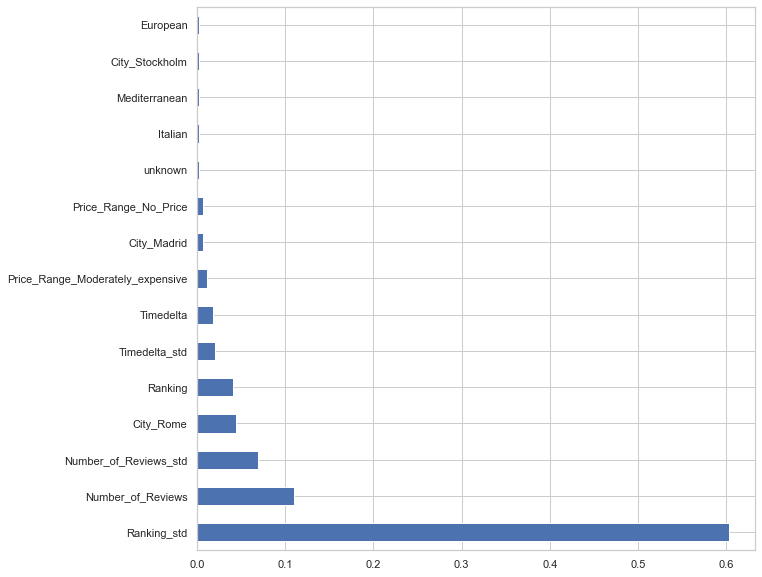

In [300]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

## Submission

In [430]:
test_data = test_data.drop(['Rating'], axis=1)

In [431]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [432]:
predict_submission

array([0.634, 0.839, 0.869, ..., 0.62 , 0.895, 0.829])

In [433]:
sample_submission['Rating'] = predict_submission


In [434]:
sample_submission

,Restaurant_id,Rating
0,id_0,0.634
1,id_1,0.839
2,id_2,0.869
3,id_3,0.872
4,id_4,0.892
...,...,...
9995,id_9995,0.889
9996,id_9996,0.834
9997,id_9997,0.620
9998,id_9998,0.895


#### Generating inverse Min Max scaler for predicted feature

In [435]:
def rev_min_max_func(scaled_val):
    max_val = max(df_train['Rating'])
    min_val = min(df_train['Rating'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
sample_submission['Rating']=sample_submission['Rating'].apply(lambda x: rev_min_max_func(x))



In [436]:
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.536
1,id_1,4.356
2,id_2,4.476
3,id_3,4.488
4,id_4,4.568
5,id_5,4.544
6,id_6,2.504
7,id_7,3.188
8,id_8,4.488
9,id_9,4.804
